In [46]:
## Code to extract data from Matera experiment - vertical geophones

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import obspy
import scipy


In [47]:
# opening the files and extracing the data from the .txt file
file = open("/Users/annamaria/PhD/Data/Matera/20200214_Line1_Matera/23_23_10_2019_12_15_00_004.txt_line1",'r')
data = []

for line in file:
    rows = line.split()
    if not rows:
        continue
    else:
        data.append(rows)
   

In [54]:
# transforming data into floats
data_set = np.zeros(len(data))
for i in range(len(data)):
    b = [float(s) for s in data[i]]
    #print(type(b))
    data_set[i] = float(b[0])
print("length of the whole data set:",np.shape(data_set))

length of the whole data set: (901120,)


In [52]:
# parameters definition
nb_sens = 20 #number of sensors
sig_len = (len(data_set))//nb_sens #signal length

Shape of the signal matrix: (45056, 20)


In [53]:
# creating a matrix with data from each sensor

# defining the matrix where sensor info will go:
mat_signal = np.zeros((sig_len,nb_sens))
value = 0

for column in range(nb_sens):
    row = 0
    while row < sig_len:
        adding = data_set[value]   
        mat_signal[row, column] = adding
        row += 1
        value += 1
        
    
print("Shape of the signal matrix:",np.shape(mat_signal))

Shape of the signal matrix: (45056, 20)


<Figure size 432x288 with 0 Axes>

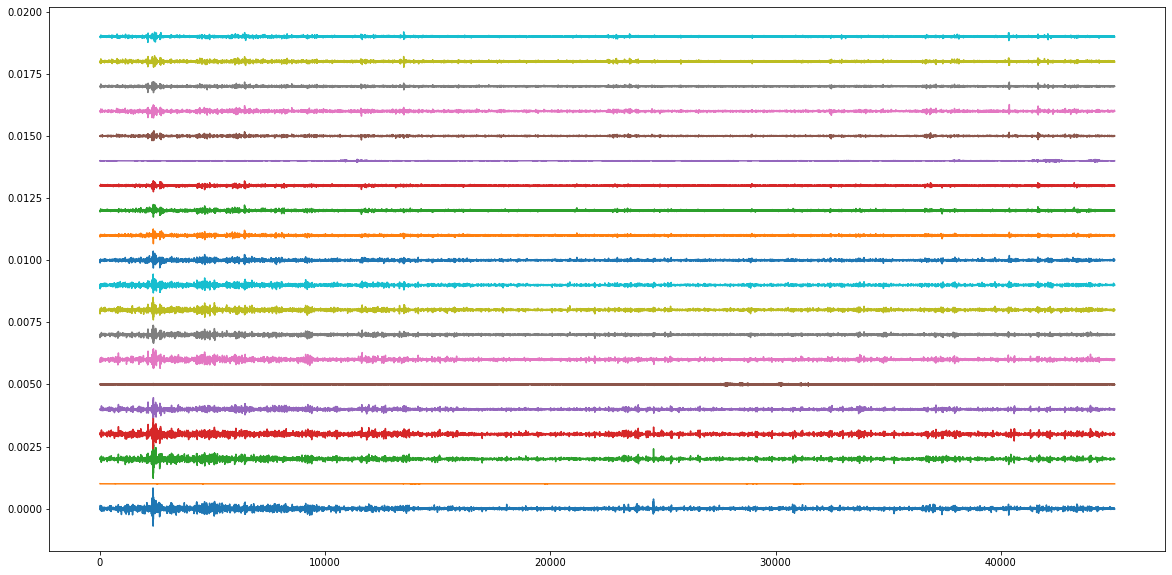

In [24]:
# plotting the signals from each sensor

plt.figure()
plt.figure(figsize=(20,10))
for column in range(nb_sens):
    plt.plot(mat_signal[:,column]+0.001*column)    

<Figure size 432x288 with 0 Axes>

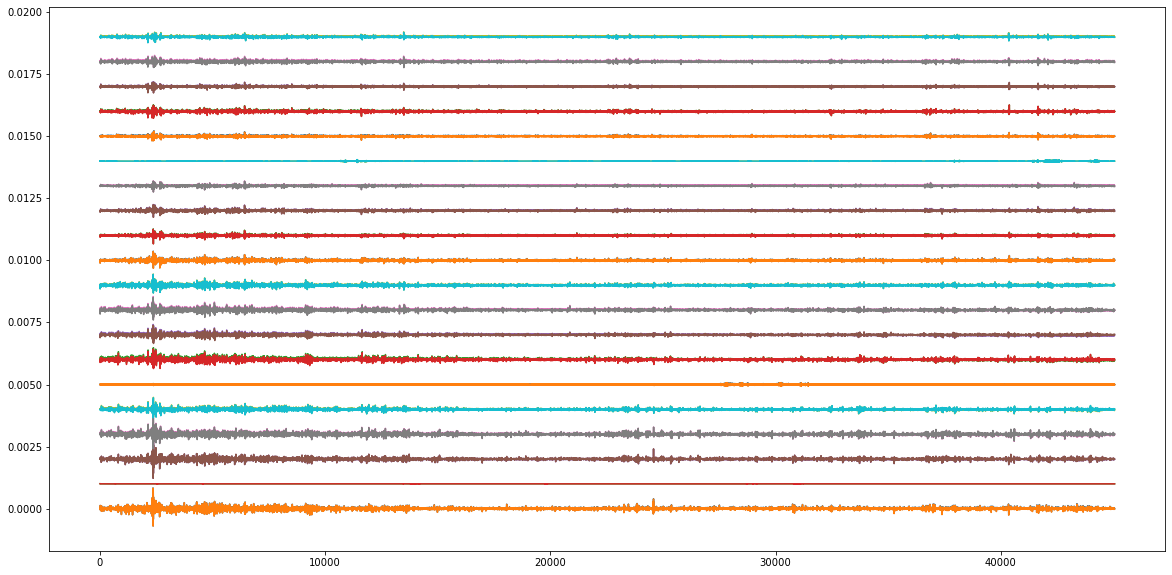

In [51]:
# removing trend and mean
mat_processed = np.zeros((sig_len,nb_sens))

for column in range(nb_sens):
    signal = mat_signal[:,column]
    signal_dt = obspy.signal.detrend.simple(signal)
    signal_rm = scipy.signal.detrend(signal_dt)
    
    mat_processed[:,column] = signal_rm
    
    
plt.figure()
plt.figure(figsize=(20,10))
for column in range(nb_sens):
    plt.plot(mat_signal[:,column]+0.001*column) 
    plt.plot(mat_processed[:,column]+0.001*column)  

In column 0 the normalized mean is: 0.931651252015
In column 1 the normalized mean is: 0.0376124867681
such a bad luck - this is below threshold
In column 2 the normalized mean is: 0.874477338299
In column 3 the normalized mean is: 1.0
In column 4 the normalized mean is: 0.673346451137
In column 5 the normalized mean is: 0.185127635115
such a bad luck - this is below threshold
In column 6 the normalized mean is: 0.793597261981
In column 7 the normalized mean is: 0.59285858084
In column 8 the normalized mean is: 0.722642810451
In column 9 the normalized mean is: 0.664987012097
In column 10 the normalized mean is: 0.567350932733
In column 11 the normalized mean is: 0.432157977963
In column 12 the normalized mean is: 0.462742478539
In column 13 the normalized mean is: 0.385354375807
In column 14 the normalized mean is: 0.0833235913112
such a bad luck - this is below threshold
In column 15 the normalized mean is: 0.378928582201
In column 16 the normalized mean is: 0.548712712702
In column 

<Figure size 432x288 with 0 Axes>

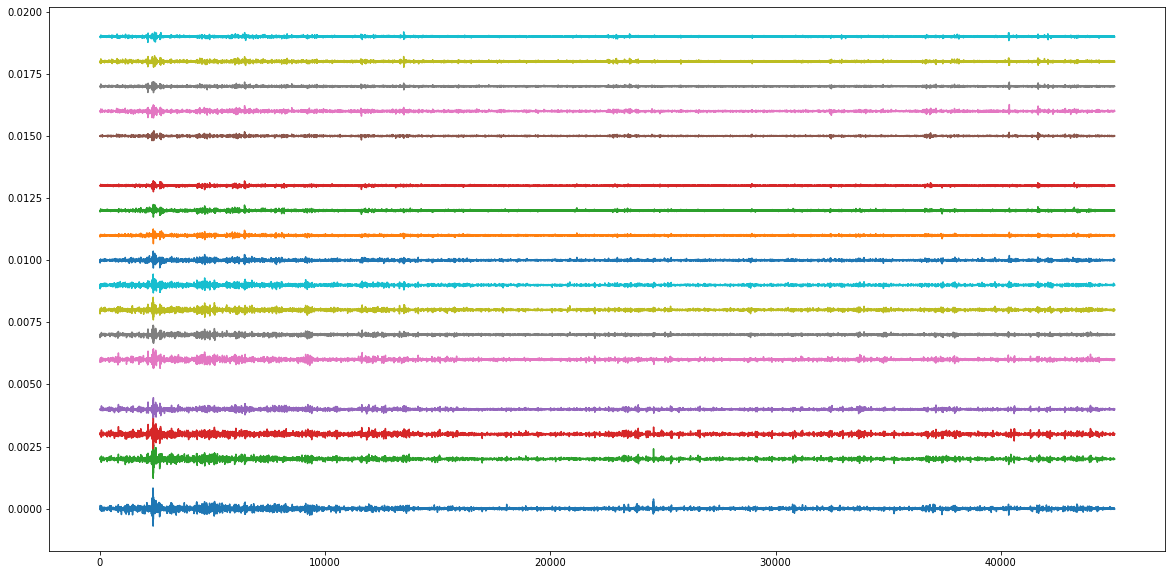

In [85]:
# removing damaged signal

tres = 0.26 #threshold for the mean [%] in refernece to the max one
temp = np.zeros((sig_len,nb_sens)) 
temp2 = np.zeros(nb_sens)
good_signal = np.zeros((sig_len,nb_sens)) 

for column in range(nb_sens):
    absolute_signal = abs(mat_processed[:,column])
    mean_signal = sum(absolute_signal)/len(absolute_signal)
    temp[:,column] = absolute_signal
    temp2[column] =  mean_signal


# max value of mean to normalize mean
max_ampl = max(temp2)

# mean normalization
for column in range(nb_sens):
    nor_mean = temp2[column]/max_ampl
    print("In column",column,"the normalized mean is:", nor_mean)
    # removing whole signals where first recording is damaged 
    if temp2[0]/max_ampl < tres:
        print("the first row is buuu")
        good_signal[:,column] = float("nan")
    #removing recordings form sensors which average is below treshold
    elif nor_mean < tres:
        print("such a bad luck - this is below threshold")
        good_signal[:,column] = float("nan")
    else:
        good_signal[:,column] = mat_processed[:,column]

# figure of the signal wiht removed  
plt.figure()
plt.figure(figsize=(20,10))
for column in range(nb_sens):
    plt.plot(good_signal[:,column]+0.001*column) 

In [90]:
# saving processed data
np.save("/Users/annamaria/PhD/work/STA_LTA/exaple_data",good_signal)